# Baseball Analysis

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

Importing the .txt from the home page 

In [90]:
data=pd.read_csv('baseball.txt')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [91]:
df=pd.DataFrame(data=data)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [92]:
df.shape

(30, 17)

In [93]:
#List of all 17 columns:
cols=list(df.columns)
cols

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

In [94]:
df.keys()

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [95]:
df.describe

<bound method NDFrame.describe of       W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278 

In [96]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


With the above description , it is known that total count is 30 , mean for every columns such winning is 80 and average runs scored here is 688 and so on..
There is a Minimum value and maximum value for each column, suppose we take HR (HOME RUNS) , min home run scored is 100 and maximun home run scored is 232.
We can also have a watch on standard deviation of the whole data.

In [97]:
# 1st 5 data count
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [98]:
#last 5 data count
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [99]:
#dtypes of the data where everything is integer except ERA that is floated data type.
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

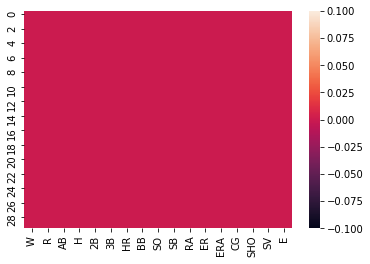

In [100]:
sns.heatmap(df.isnull())

The above graph is here to show that if there are any null values in the above dataset, I have found out that the red color shows the '0' value here, it means that none of the value is emmpty(Null Values).
In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 ' .

In [101]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

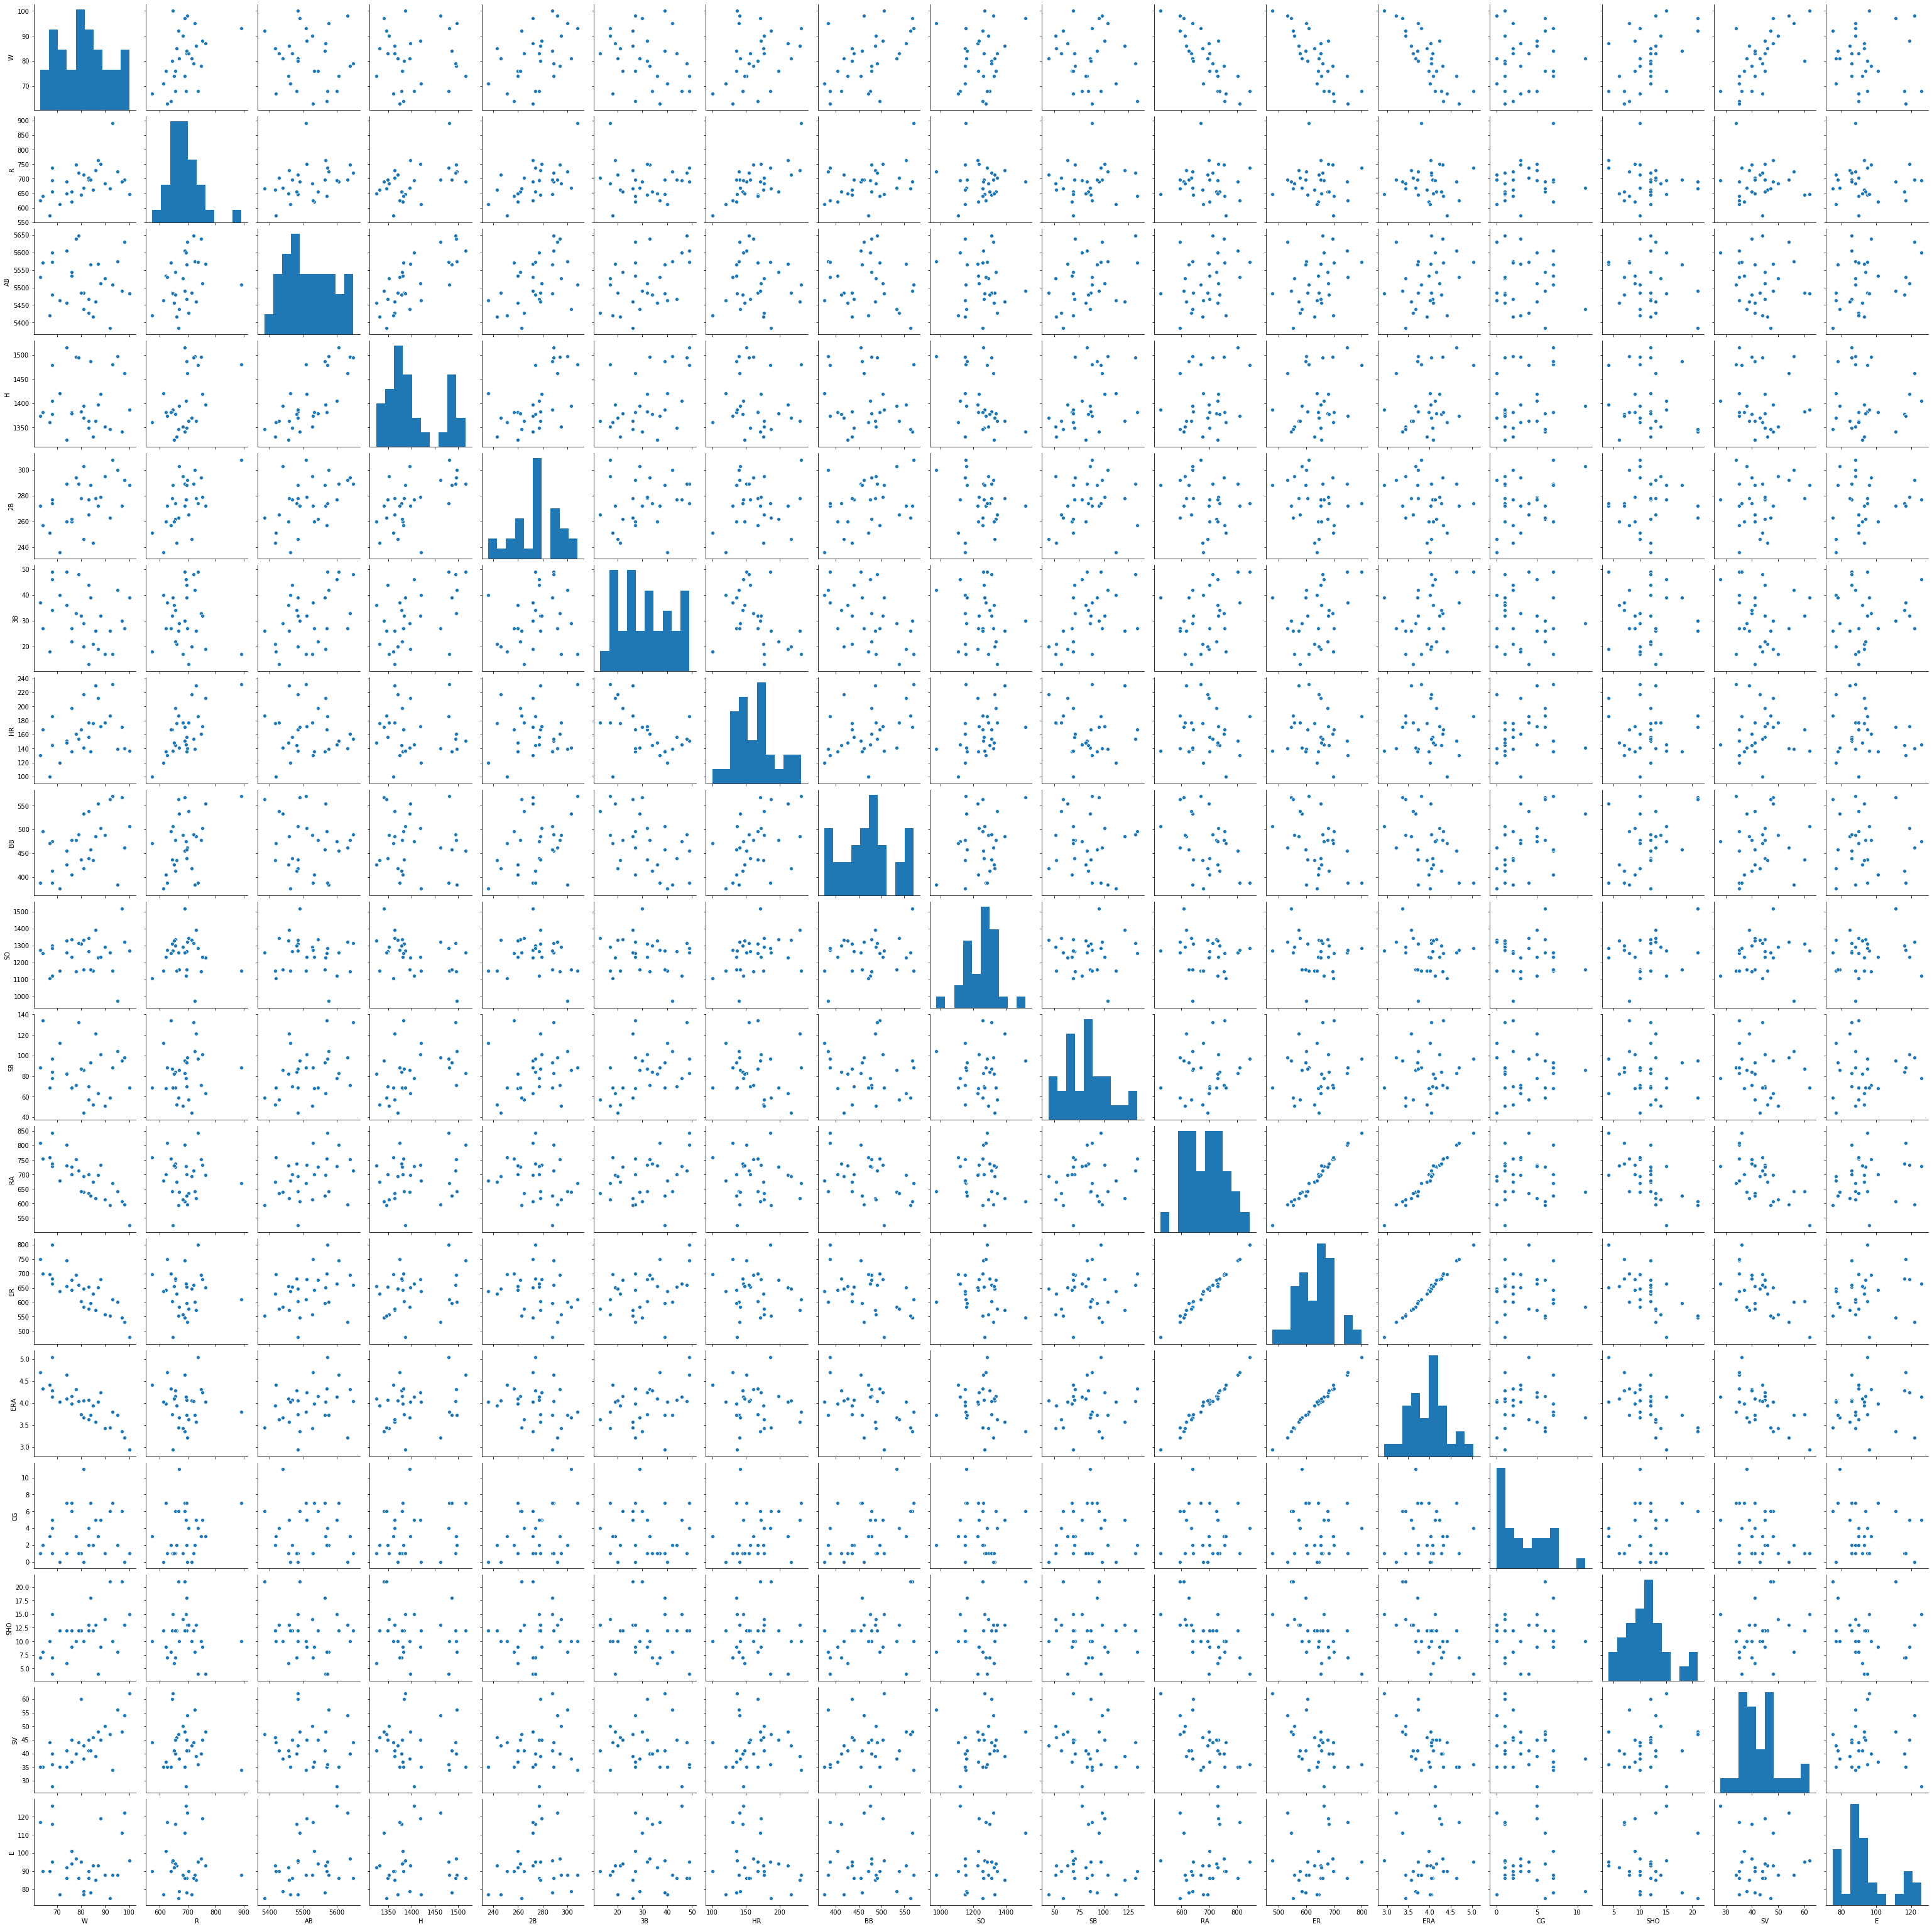

In [102]:
sns.pairplot(df)

Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, / shows the positive corelation where as \ shows negative corelation.


Through the above plot we could see that the variables such as SB: STOLEN BASES, RA: OPPONENTS RUN SCORED, ER: EARNED RUNS ALLOWED are very much positively corelated with each other in comparison to other variables.

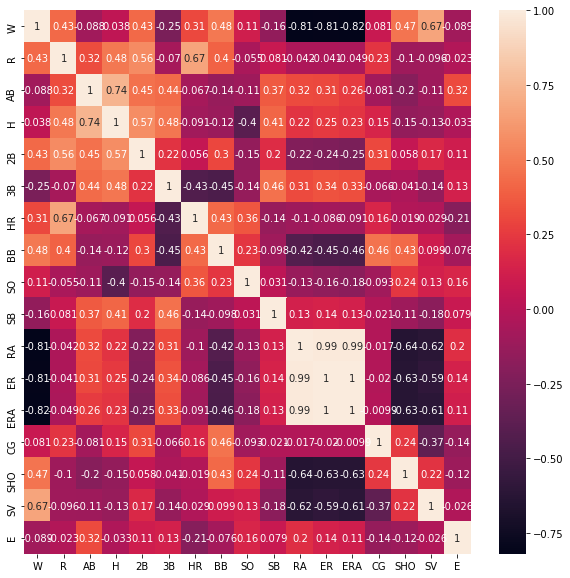

In [103]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Through the above heatmap a picture of the map is prepared where it is show that which variables are showing positive relationship and which are showing the negative relationship.

the black dots represent negative corelation where as off white color shows the positive corelation.

Hence with respect to the winning ERA , ER , RA are negatively corelated. 

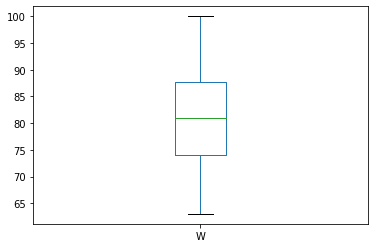

In [104]:
df['W'].plot.box()

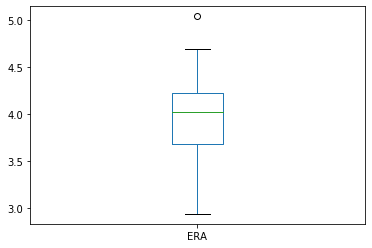

In [105]:
df['ERA'].plot.box()

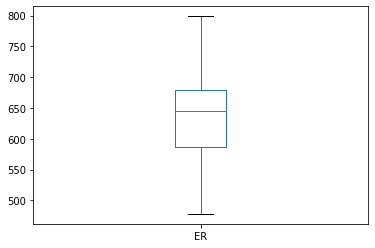

In [106]:
df['ER'].plot.box()

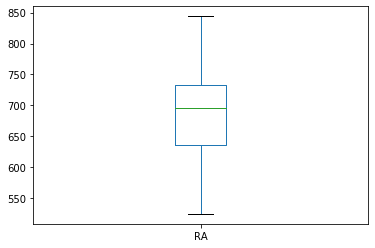

In [107]:
df['RA'].plot.box()

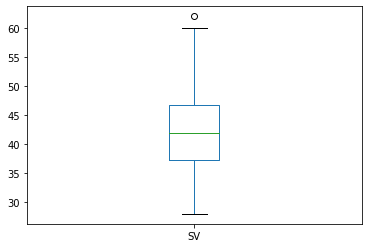

In [108]:
df['SV'].plot.box()

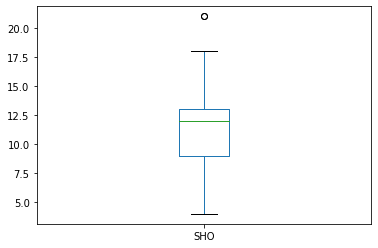

In [109]:
df['SHO'].plot.box()

The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables.
In some of the variables such as SHO, SV, ERA ; The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.


Outliers here are the observations that we find at the abnormal distance from other values.

In [110]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


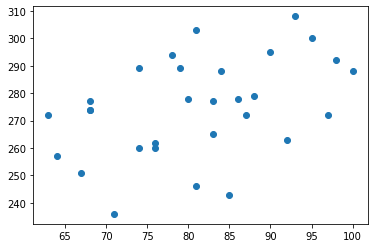

In [111]:
plt.scatter(df.iloc[:,0],df.iloc[:,4])
plt.show()

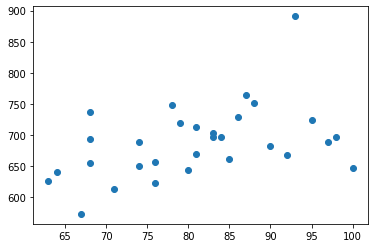

In [112]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

The above Scattered plot is here to show how the data are scattered and forming a somewhat positive relationship between each other.

How much one variable is affecting the another value on the basis of x and y axis.

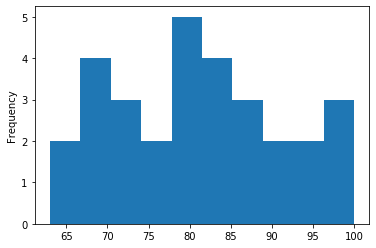

In [113]:
df['W'].plot.hist()

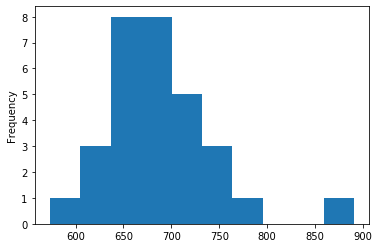

In [114]:
df['R'].plot.hist()

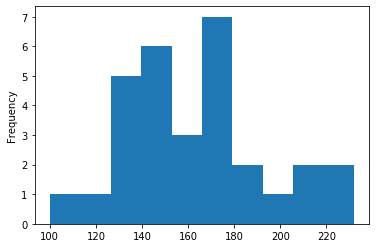

In [115]:
df['HR'].plot.hist()

Histogram is a way of displaying the data using heighted bars which is similar to the Bar plot but under histogram we group the numbers into ranges. 

Here the height of the bar decides that how many are falling in the the each range, such as:

W (Winning) shows that 80 winnings has been made 5 time where as the teams have scored homeruns HR in the range of 170 - 180 for 7 times.

# Removing Outliers

In [116]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(30, 17)


In [117]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(29, 17)


After removing the outliers from the data the shape of the data has change from 30,17 to 29,17 which shows that with the z score we are able to remove 1 row , Hence our new data shae is (29,17)

# Skewness

In [118]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In the above fomat we see that there are few variabled where the data is skewed, I have treatd them with np.log in order to maintain the skewness below .55 value .

In [119]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

In [120]:
df1.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

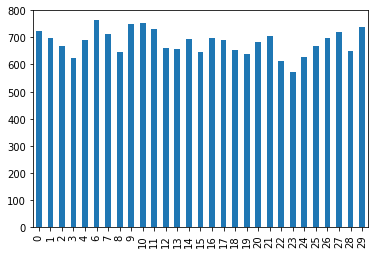

In [121]:
#run scored
df1['R'].plot.bar()

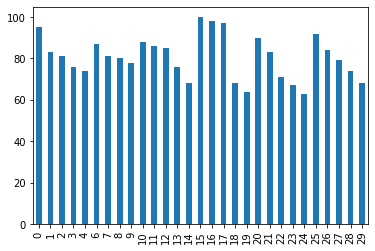

In [122]:
#winning barplot
df1['W'].plot.bar()

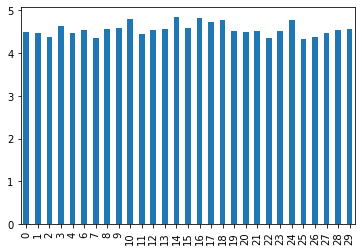

In [123]:
#bar plot for the errors by the different team
df1['E'].plot.bar()

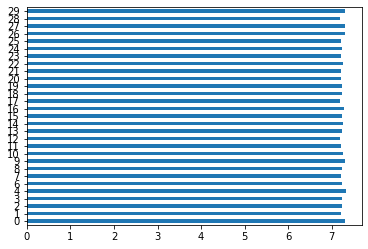

In [124]:
#the Graph show the number of hits by the batters done by the different team
df1['H'].plot.barh()

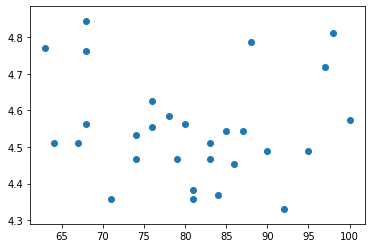

In [125]:
# Winning VS Errors
plt.scatter(df1.iloc[:,0],df1.iloc[:,-1])
plt.show()

In [126]:
df1.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908


# Putting the variables into X AND Y 

In [127]:
x=df1.iloc[:,1:17]
x.shape

(29, 16)

In [128]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908
6,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295
7,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709
8,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348
9,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967
10,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,9,3.828641,4.787492


In [129]:
y=df1.iloc[:,0:1]
y.shape

(29, 1)

In [130]:
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


# Model Selection

# Linear Regression

In [131]:
from sklearn import linear_model

In [132]:
from sklearn.linear_model import LogisticRegression

In [133]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.7204818845861676
r2_score corresponding to random state:  43 is:  -2.8084097313477674
r2_score corresponding to random state:  44 is:  0.4685069700772735
r2_score corresponding to random state:  45 is:  -1.0187013987289637
r2_score corresponding to random state:  46 is:  0.2702521232991666
r2_score corresponding to random state:  47 is:  -2.534812143144785
r2_score corresponding to random state:  48 is:  -0.7161672843523401
r2_score corresponding to random state:  49 is:  -0.07908477106880007
r2_score corresponding to random state:  50 is:  0.7881773552843989
r2_score corresponding to random state:  51 is:  0.23669716019513054
r2_score corresponding to random state:  52 is:  0.22932608330241766
r2_score corresponding to random state:  53 is:  0.2599748329984636
r2_score corresponding to random state:  54 is:  -0.07195868884638923
r2_score corresponding to random state:  55 is:  -0.8159451275844645
r2_score corresponding to random state

In [134]:
x_train.shape

(20, 16)

In [135]:
y_train.shape

(20, 1)

In [136]:
lr.coef_

array([[ 8.92251563e-02, -1.80511716e-01,  1.79442100e+02,
         9.00285721e-02,  1.06052519e-01,  1.44202828e-01,
        -1.64327557e-02, -1.54159187e-02, -1.54811960e-02,
         1.52419139e-01,  7.83665261e-01, -1.69425690e+02,
         2.85590335e+00, -3.90846964e-01, -8.49681235e+00,
        -5.49795427e+00]])

In [137]:
lr.intercept_

array([-181.27645789])

In [138]:
#applying cross validation techniques:
cross_val_score(lr,x,y,cv=5,scoring='r2').mean()

0.04078645834628201

In [139]:
cross_val_score(lr,x,y,cv=5,scoring='r2').std()

0.44737734920610434

# Lasso:

In [140]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
isreh=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
grid=GridSearchCV(isreh,parameters,cv=10)
grid.fit(x,y)
grid.best_params_

{'alpha': 0.1}

In [141]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lasso=Lasso(alpha=0.01)
    lasso.fit(x_train,y_train)
    y_pred=lasso.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.7630774347022768
r2_score corresponding to random state:  43 is:  -0.23607485742511436
r2_score corresponding to random state:  44 is:  0.7681607922791789
r2_score corresponding to random state:  45 is:  -0.8072906757968816
r2_score corresponding to random state:  46 is:  0.6677744777786505
r2_score corresponding to random state:  47 is:  -0.7713512558606175
r2_score corresponding to random state:  48 is:  0.20497889538497205
r2_score corresponding to random state:  49 is:  0.46506105723903113
r2_score corresponding to random state:  50 is:  0.8052198832490391
r2_score corresponding to random state:  51 is:  0.730603118048758
r2_score corresponding to random state:  52 is:  0.37054715863186105
r2_score corresponding to random state:  53 is:  0.4926912403121334
r2_score corresponding to random state:  54 is:  -0.05877250132429612
r2_score corresponding to random state:  55 is:  -0.3073808898608126
r2_score corresponding to random state:

# Errors:

In [142]:
print("r2 score is : ",r2_score(y_test,y_pred))
print('Mean absolute error : ',mean_absolute_error(y_test,y_pred))
print('Mean Squared error : ',mean_squared_error(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.6671841892191767
Mean absolute error :  5.9502269313273946
Mean Squared error :  45.04929073334503
RMSE is :  6.711876841342146


# Logistic Regression:

In [143]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30,random_state=r_state)
    lr1=LogisticRegression()
    lr1.fit(x_train,y_train)
    y_pred=lr1.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)

r2_score corresponding to random state:  42 is:  0.37997481108312336
r2_score corresponding to random state:  43 is:  0.11707944676744941
r2_score corresponding to random state:  44 is:  0.33098591549295786
r2_score corresponding to random state:  45 is:  0.24621324621324614
r2_score corresponding to random state:  46 is:  0.2656826568265682
r2_score corresponding to random state:  47 is:  0.5181219110378913
r2_score corresponding to random state:  48 is:  0.4911378943637008
r2_score corresponding to random state:  49 is:  -1.1539589442815243
r2_score corresponding to random state:  50 is:  0.6043530626290433
r2_score corresponding to random state:  51 is:  0.42872008324661803
r2_score corresponding to random state:  52 is:  -0.5299527062532843
r2_score corresponding to random state:  53 is:  -0.27812499999999996
r2_score corresponding to random state:  54 is:  -1.4784263959390866
r2_score corresponding to random state:  55 is:  0.07723577235772372
r2_score corresponding to random stat

# ADA Boosting

In [144]:
ADA= AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[lasso,lr]}
clf=GridSearchCV(ADA,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [162]:
Ada= AdaBoostRegressor(base_estimator=lasso,learning_rate=0.001,n_estimators=100)
print("Mean r2 score for gradient boosting regressor : ",cross_val_score(ADA,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for gradient boosting regressor : ",cross_val_score(ADA,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting regressor :  -0.542636460945192
Standard Deviation in r2 score for gradient boosting regressor :  2.398562010748211


# Gradient Boosting Regressor

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
from sklearn.ensemble import GradientBoostingRegressor
GBR= GradientBoostingRegressor()
parameters={"learning_rate": [0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(GBR,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 10}

In [148]:
GBR= GradientBoostingRegressor(learning_rate=0.01,n_estimators=10)
print("Mean r2 score for gradient boosting regressor : ",cross_val_score(GBR,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for gradient boosting regressor : ",cross_val_score(GBR,x,y,cv=5,scoring="r2").std())

Mean r2 score for gradient boosting regressor :  -0.33836078703428685
Standard Deviation in r2 score for gradient boosting regressor :  0.3583014681017476


In [149]:
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908
6,87,764,5567,7.242798,272,19,212,554,1227,63,698,652,4.03,1.386294,4,3.891820,4.543295
7,81,713,5485,7.223296,246,20,217,418,1331,44,693,646,4.05,0.000000,10,3.784190,4.356709
8,80,644,5485,7.232733,278,32,167,436,1310,87,642,604,3.74,0.693147,12,4.110874,4.564348
9,78,748,5640,7.310550,294,33,161,478,1148,71,753,694,4.31,1.386294,10,3.713572,4.584967
10,88,751,5511,7.258412,279,32,172,503,1233,101,733,680,4.24,1.791759,9,3.828641,4.787492


In [150]:
print(df1.W)

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64


# K-MEANS CLUSTERING  
We are going to try here K-Means Clustering model as I can see the unsupervised machine learning.
Here kmeans will try to attempt to classify data without being trained first with labeled data.

In [151]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
kModel=kmeans.fit(df1)

In [152]:
kModel.labels_

array([2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1, 2,
       2, 0, 1, 2, 0, 0, 0], dtype=int32)

In [153]:
kModel.cluster_centers_

array([[7.56428571e+01, 6.90500000e+02, 5.54357143e+03, 7.25100371e+00,
        2.71785714e+02, 3.40714286e+01, 1.66642857e+02, 4.52000000e+02,
        1.26992857e+03, 8.47142857e+01, 7.42500000e+02, 6.88214286e+02,
        4.28214286e+00, 1.23202805e+00, 8.71428571e+00, 3.72374795e+00,
        4.57069305e+00],
       [9.07500000e+01, 6.82375000e+02, 5.48625000e+03, 7.22614017e+00,
        2.78875000e+02, 2.62500000e+01, 1.73250000e+02, 5.05750000e+02,
        1.33762500e+03, 7.96250000e+01, 6.04000000e+02, 5.52375000e+02,
        3.41375000e+00, 1.17155740e+00, 1.52500000e+01, 3.92284222e+00,
        4.55678986e+00],
       [7.87142857e+01, 6.61428571e+02, 5.49700000e+03, 7.25379070e+00,
        2.71142857e+02, 3.35714286e+01, 1.36857143e+02, 4.47000000e+02,
        1.11642857e+03, 8.48571429e+01, 6.78571429e+02, 6.30285714e+02,
        3.94714286e+00, 1.41994666e+00, 1.21428571e+01, 3.72170106e+00,
        4.49930872e+00]])

In [154]:
pd.crosstab(df1.W,kModel.labels_)

col_0,0,1,2
W,,,
63,1,0,0
64,1,0,0
67,0,0,1
68,2,0,1
71,0,0,1
74,2,0,0
76,2,0,0
78,1,0,0
79,1,0,0


In [155]:
from sklearn.metrics import homogeneity_score

In [156]:
print(homogeneity_score(kModel.labels_,df1.W))

0.8462246865288795


The above Homogeneity_ score is showing 84.62% which is also somewhat near to what we have found in our Linear Regression Model.
Hence, I am going to choose Linear Regression model for this baseball dataset as the other models such as kmeans clusterning, logistic regression accuracy score % was lower than Linear Regression where as the  ada boosting, gradient booster, cross validation were not able to help Linear regression to boost the accuracy score.
According to my analysis and understanding I am choosing my final model as LINEAR REGRESSION for baseball dataset.

# Choosing Model

# LASSO REGRESSION

I AM going to choose Lasso Regression as the final model to predict the given dataset of baseball because it is giving the max r2 score that is 89.07% which is more than any other model which have been tried above hence, only one model that is k-means is showing 84.62% accuracy score but still less than lasso. Therefore I choose Lasso here.

# Saving the file

In [157]:
from sklearn.externals import joblib

In [158]:
joblib.dump(lasso,'Project_2_baseball_analysis.obj')

['Project_2_baseball_analysis.obj']

In [159]:
model=joblib.load('Project_2_baseball_analysis.obj')

In [160]:
lasso.predict(x_test)

array([73.46780193, 56.5711148 , 92.56307717, 76.42986182, 91.1656175 ,
       96.78321769, 88.76313761, 86.60464089, 89.68123868])